In [43]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
import numpy as np
import math
import pylab as plt

%matplotlib inline

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [44]:
train_data = pd.read_csv('/content/drive/My Drive/kaggle-titanic/train.csv')
test_data = pd.read_csv('/content/drive/My Drive/kaggle-titanic/test.csv')
p_id = test_data['PassengerId']
data = pd.concat([train_data, test_data])
data.shape

(1309, 12)

In [45]:
print(train_data.isnull().any())
print()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool



In [46]:
print(train_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [47]:
train_data['Cabin'].fillna('NotFClass', inplace=True)
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Text(0.5, 1.0, 'Idade')

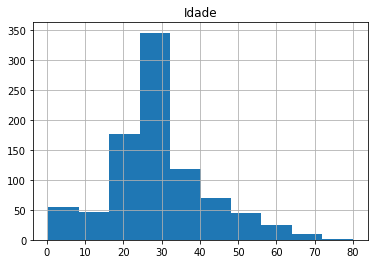

In [48]:
media_idade = train_data['Age'].mean()
train_data['Age'].fillna(media_idade, inplace=True)
train_data['Age'].hist()
plt.title('Idade')

In [49]:
train_data['Embarked'].fillna('S', inplace=True)
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [50]:
train_data.to_csv('lab2_train_no_nulls.csv', index=False)

In [51]:
df_train = pd.read_csv('lab2_train_no_nulls.csv')

In [52]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [53]:
print(df_train.sort_values('Age', ascending=False).head(5)['Age'])
print(df_train.sort_values('Age', ascending=True).head(5)['Age'])

630    80.0
851    74.0
96     71.0
493    71.0
116    70.5
Name: Age, dtype: float64
803    0.42
755    0.67
644    0.75
469    0.75
831    0.83
Name: Age, dtype: float64


In [54]:
print(df_train.sort_values('Fare', ascending=False).head(5)['Fare'])
print(df_train.sort_values('Fare', ascending=True).head(5)['Fare'])

258    512.3292
737    512.3292
679    512.3292
88     263.0000
27     263.0000
Name: Fare, dtype: float64
271    0.0
597    0.0
302    0.0
633    0.0
277    0.0
Name: Fare, dtype: float64


In [55]:
df_train.to_csv('train_no_nulls_no_outliers.csv', index=False)

In [56]:
df_train = pd.read_csv('train_no_nulls_no_outliers.csv')
df_train.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NotFClass,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [57]:
novas_colunas = pd.get_dummies(df_train['Embarked']) 
df_train2 = pd.concat([df_train,novas_colunas], axis=1) # axis = 1 concatena colunas. axis = 0 concatena linhas
df_train2.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,C,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NotFClass,S,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NotFClass,S,0,0,1


In [58]:
df_train2.drop('Embarked', axis=1, inplace=True)

In [59]:
novas_colunas_pclass = pd.get_dummies(df_train['Pclass']) 
novas_colunas_sex = pd.get_dummies(df_train['Sex']) 

df_train3 = pd.concat([df_train2,novas_colunas_pclass, novas_colunas_sex], axis=1)
df_train3.drop(['Pclass', 'Sex'], axis=1, inplace=True)
df_train3.head(3)

,PassengerId,Survived,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,C,Q,S,1,2,3,female,male
0,1,0,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NotFClass,0,0,1,0,0,1,0,1
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,1,0,0,1,0,0,1,0
2,3,1,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NotFClass,0,0,1,0,0,1,1,0


In [60]:
df_train3.to_csv('train_no_nulls_no_outliers_ohe.csv', index=False)

In [61]:
df_train3.to_csv('train_no_nulls_no_outliers_feat_hash.csv', index=False)

In [62]:
df_train = pd.read_csv('train_no_nulls_no_outliers_feat_hash.csv')
df_train.head(2)

,PassengerId,Survived,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,C,Q,S,1,2,3,female,male
0,1,0,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NotFClass,0,0,1,0,0,1,0,1
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,1,0,0,1,0,0,1,0


In [63]:
from sklearn import preprocessing

## dados originais
ID_original = df_train['PassengerId'].values.reshape(-1, 1)
## Normaliza os dados
ID_standard = preprocessing.StandardScaler().fit_transform(df_train['PassengerId'].values.reshape(-1, 1)) 
## Muda a escala dos dados para valores entre 0 e 1 (valores padrão, que poderiam ser personalizados)
ID_minmax = preprocessing.MinMaxScaler().fit_transform(df_train['PassengerId'].values.reshape(-1, 1))

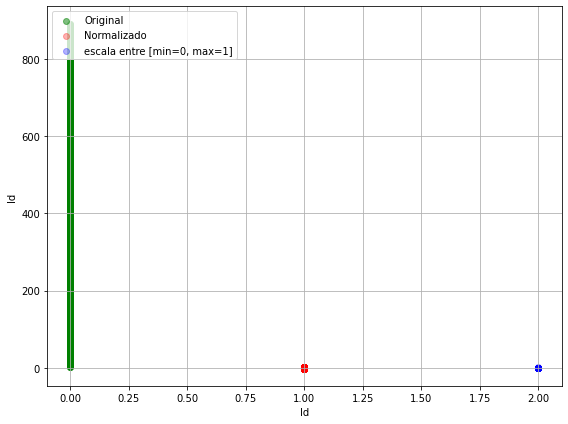

In [64]:
from matplotlib import pyplot as plt

def plot():
    plt.figure(figsize=(8,6))

    plt.scatter([0]*len(ID_original), ID_original,
            color='green', label='Original', alpha=0.5)

    plt.scatter([1]*len(ID_standard), ID_standard, color='red',
            label='Normalizado', alpha=0.3)

    plt.scatter([2]*len(ID_minmax), ID_minmax,
            color='blue', label='escala entre [min=0, max=1]', alpha=0.3)

    plt.xlabel('Id')
    plt.ylabel('Id')
    plt.legend(loc='upper left')
    plt.grid()

    plt.tight_layout()

plot()
plt.show()

In [65]:
## dados originais
Fare_original = df_train['Fare'].values.reshape(-1, 1)
## Normaliza os dados
Fare_standard = preprocessing.StandardScaler().fit_transform(df_train['Fare'].values.reshape(-1, 1)) 
## Muda a escala dos dados para valores entre 0 e 1 (valores padrão, que poderiam ser personalizados)
Fare_minmax = preprocessing.MinMaxScaler().fit_transform(df_train['Fare'].values.reshape(-1, 1))

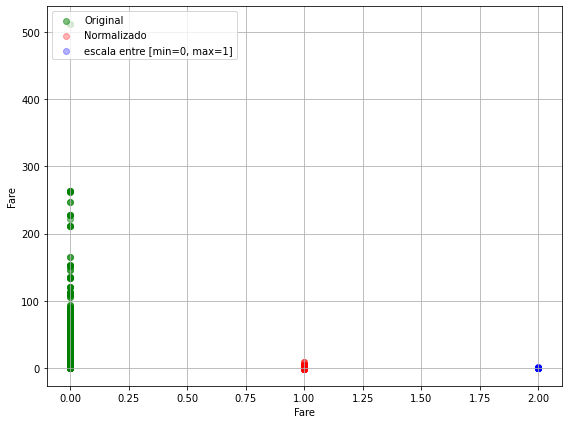

In [66]:
from matplotlib import pyplot as plt

def plot():
    plt.figure(figsize=(8,6))

    plt.scatter([0]*len(Fare_original), Fare_original,
            color='green', label='Original', alpha=0.5)

    plt.scatter([1]*len(Fare_original), Fare_standard, color='red',
            label='Normalizado', alpha=0.3)

    plt.scatter([2]*len(Fare_original), Fare_minmax,
            color='blue', label='escala entre [min=0, max=1]', alpha=0.3)

    plt.xlabel('Fare')
    plt.ylabel('Fare')
    plt.legend(loc='upper left')
    plt.grid()

    plt.tight_layout()

plot()
plt.show()